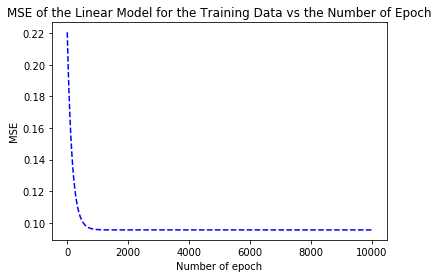

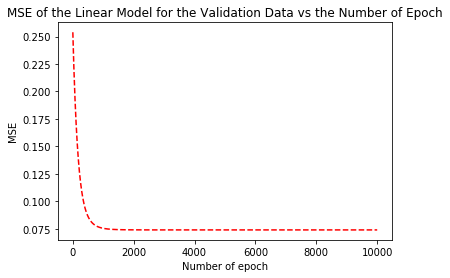

[ 3.57561569  4.32462177]


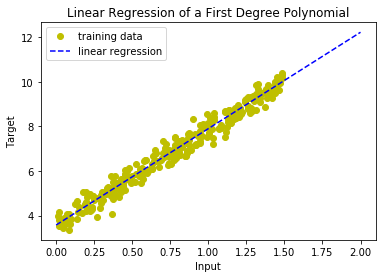

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#hyperparameter
step_size=10e-5
num_epochs=10000

#fetch training data
data=np.genfromtxt("Datasets\Dataset_2_train.csv",names=['x_tr','y_tr'], delimiter=",")
x1_tr=data['x_tr']
y_tr=data['y_tr']
x0_tr=np.ones(300)
x_tr=np.column_stack((x0_tr,x1_tr))

#fetch validation data
data=np.genfromtxt("Datasets\Dataset_2_valid.csv",names=['x_val','y_val'], delimiter=",")
x1_val=data['x_val']
y_val=data['y_val']
x0_val=np.ones(100)
x_val=np.column_stack((x0_val,x1_val))

#fetch testing data
data=np.genfromtxt("Datasets\Dataset_2_test.csv",names=['x_tst','y_tst'], delimiter=",")
x1_tst=data['x_tst']
y_tst=data['y_tst']
x0_tst=np.ones(100)
x_tst=np.column_stack((x0_tst,x1_tst))
    
w=np.array([4.3,3.5])
MSE_tr_arr=[]
MSE_val_arr=[]
MSE_tst_arr=[]
epoch_ind=[]

#compute the MSE of a prediction on a given dataset
def MSE(x,y,w):
    return (y-x.dot(w)).T.dot((y-x.dot(w)))/x.shape[0]

#iterate 10k times (complete 10k epoch)
for i in range(0,num_epochs):
    #the complete loop below is an epoch (sweep of all the examples)
    for j in range(0,299):
        #update the parameters in the direction of decreasing loss        
        w[0]=w[0]-step_size*(x_tr[j].dot(w)-y_tr[j])
        w[1]=w[1]-step_size*(x_tr[j].dot(w)-y_tr[j])*x_tr[j,1]
    #compute the MSE on validation and training data for every epoch
    MSE_tr_arr.append(MSE(x_tr,y_tr,w))
    MSE_val_arr.append(MSE(x_val,y_val,w))
    MSE_tst_arr.append(MSE(x_tst,y_tst,w))
    epoch_ind.append(i+1)

#print MSE_tr_arr
#print MSE_val_arr
#print epoch_ind

#convert the lists into np.arrays
MSE_tr_arr=np.array(MSE_tr_arr)
MSE_val_arr=np.array(MSE_val_arr)
MSE_tst_arr=np.array(MSE_tst_arr)
epoch_ind=np.array(epoch_ind)

#plot the learning curve
plt.plot(epoch_ind,MSE_tr_arr,'b--')
plt.xlabel('Number of epoch')
plt.ylabel('MSE')
plt.title("MSE of the Linear Model for the Training Data vs the Number of Epoch")
#plt.savefig('plots/plot2.1a.png')
plt.show()

plt.plot(epoch_ind,MSE_val_arr,'r--')
plt.xlabel('Number of epoch')
plt.ylabel('MSE')
plt.title("MSE of the Linear Model for the Validation Data vs the Number of Epoch")
#plt.savefig('plots/plot2.1b.png')
plt.show()

print w

t1 = np.arange(0, 2, 0.000001)
plt.plot(x1_tr,y_tr,'yo',t1,w[0]+w[1]*t1,'b--')
plt.xlabel('Input')
plt.ylabel('Target')
plt.title("Linear Regression of a First Degree Polynomial")
plt.legend(['training data','linear regression','ok,','s'])
#plt.savefig('plots/plot2.1c.png')
plt.show()
        
        

In [6]:
print "The Minimal MSE of the Training Set is: ",MSE_tr_arr[np.argmin(MSE_tr_arr)]
print "The Minimal MSE of the Validation Set is: ",MSE_val_arr[np.argmin(MSE_val_arr)]


The Minimal MSE of the Training Set is:  0.0955155496473
The Minimal MSE of the Validation Set is:  0.0738788145992


In [7]:
print "The Minimal MSE of the Testing Set is: ",MSE_tst_arr[np.argmin(MSE_tst_arr)]

The Minimal MSE of the Testing Set is:  0.0687187132877
